In [42]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Lectura del archivo generado en transform.ipynb

In [43]:
df = pd.read_csv('../data/train_user_collapsed_small_data.csv')
x = df.drop(columns=['customer_ID', 'target'])
y = df['target']

Definición de las X e Y tanto de train como de test, teniendo al test como el 30% de los datos del dataset obtenido del csv. Seguido de ello, se hace uso del MLPClassifier, que genera una red neuronal con las siguientes iteraciones:
-3 capas ocultas de 80, 60 y 15 nodos
-500 iteraciones máximas (épocas)
-función de activación empleada: ReLu
-algoritmo solucionador: adam

Seguido de ello, se ace un fit de x e y del test

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state= 1)


In [45]:
clf = MLPClassifier(hidden_layer_sizes=(80, 65), max_iter=250, activation = 'relu', solver = 'adam', random_state=1, learning_rate_init= 0.001)


In [46]:
train_score = []
test_score = []
for i in range (clf.max_iter):
    clf.partial_fit(x_train, y_train, classes = np.unique(y_train))
    train_score.append(clf.score(x_train, y_train))
    test_score.append(clf.score(x_test, y_test))


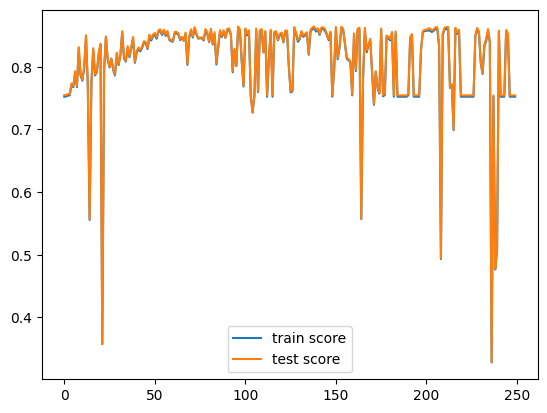

In [47]:
plt.plot(train_score, label ="train score")
plt.plot(test_score, label = "test score")
plt.legend()
plt.show()

In [48]:
clf.fit(x_test, y_test)

MLPClassifier(hidden_layer_sizes=(80, 65), max_iter=250, random_state=1)

Se obtiene la matriz de salida de predicción, llamado también como target

In [49]:
y_pred = clf.predict(x_test)
y_pred

array([1., 0., 0., ..., 0., 0., 1.])

Se calcula el porcentaje de confianza del modelo, basando en el cálculo interno de la matriz de confusión empleando como el x_test e y_test

In [50]:
clf.score(x_test, y_test)

0.8642288493237161